In [33]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_df = pd.read_csv('/content/fear_greed_index.csv')
trader_df = pd.read_csv('/content/historical_data.csv')

sentiment_df.head()
trader_df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [34]:
# Mount Google Drive and import necessary libraries
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

sentiment_df = pd.read_csv('/content/fear_greed_index.csv')
trader_df = pd.read_csv('/content/historical_data.csv')

print("Datasets loaded successfully!")
print(f"Sentiment Data Shape: {sentiment_df.shape}")
print(f"Trader Data Shape: {trader_df.shape}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Libraries imported successfully!
Datasets loaded successfully!
Sentiment Data Shape: (2644, 4)
Trader Data Shape: (211224, 16)


In [35]:
# Initial Data Exploration
def explore_datasets(sentiment_df, trader_df):
    print("=== BITCOIN SENTIMENT DATASET ===")
    print(sentiment_df.info())
    print("\nFirst 5 rows:")
    display(sentiment_df.head())

    print("\n=== TRADER HISTORICAL DATA ===")
    print(trader_df.info())
    print("\nFirst 5 rows:")
    display(trader_df.head())

    # Basic statistics
    print("\n=== SENTIMENT DATA STATISTICS ===")
    print(sentiment_df.describe())

    print("\n=== TRADER DATA STATISTICS ===")
    print(trader_df.describe())

explore_datasets(sentiment_df, trader_df)

=== BITCOIN SENTIMENT DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None

First 5 rows:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05



=== TRADER HISTORICAL DATA ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  f

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12



=== SENTIMENT DATA STATISTICS ===
          timestamp        value
count  2.644000e+03  2644.000000
mean   1.631899e+09    46.981089
std    6.597967e+07    21.827680
min    1.517463e+09     5.000000
25%    1.574811e+09    28.000000
50%    1.631900e+09    46.000000
75%    1.688989e+09    66.000000
max    1.746164e+09    95.000000

=== TRADER DATA STATISTICS ===
       Execution Price   Size Tokens      Size USD  Start Position  \
count    211224.000000  2.112240e+05  2.112240e+05    2.112240e+05   
mean      11414.723350  4.623365e+03  5.639451e+03   -2.994625e+04   
std       29447.654868  1.042729e+05  3.657514e+04    6.738074e+05   
min           0.000005  8.740000e-07  0.000000e+00   -1.433463e+07   
25%           4.854700  2.940000e+00  1.937900e+02   -3.762311e+02   
50%          18.280000  3.200000e+01  5.970450e+02    8.472793e+01   
75%         101.580000  1.879025e+02  2.058960e+03    9.337278e+03   
max      109004.000000  1.582244e+07  3.921431e+06    3.050948e+07   

     

In [36]:
def preprocess_data(sentiment_df, trader_df):
    import pandas as pd

    # --- Identify the correct date column in sentiment data ---
    sentiment_date_col = None
    date_candidates = ['Date', 'date', 'DATE', 'timestamp', 'Time', 'time']

    for col in date_candidates:
        if col in sentiment_df.columns:
            sentiment_date_col = col
            break

    if sentiment_date_col is None:
        # Fallback: try to infer date column from string-type columns
        for col in sentiment_df.columns:
            if sentiment_df[col].dtype == 'object':
                try:
                    pd.to_datetime(sentiment_df[col].head())
                    sentiment_date_col = col
                    break
                except:
                    continue

    if sentiment_date_col is None:
        raise ValueError("No valid date column found in sentiment data.")

    print(f"✅ Using '{sentiment_date_col}' as date column for sentiment data")

    # Convert sentiment date column to datetime
    sentiment_df['date'] = pd.to_datetime(sentiment_df[sentiment_date_col], errors='coerce')

    # --- Handle trader data timestamps ---
    timestamp_col = None
    for col in ['time', 'timestamp', 'Time', 'Timestamp']:
        if col in trader_df.columns:
            timestamp_col = col
            break

    if timestamp_col is None:
        raise ValueError("No timestamp column found in trader data.")

    trader_df['time'] = pd.to_datetime(trader_df[timestamp_col], unit='ms', errors='coerce')
    trader_df['date'] = pd.to_datetime(trader_df['time'].dt.date)

    # --- Create additional features ---
    trader_df['trade_hour'] = trader_df['time'].dt.hour
    trader_df['day_of_week'] = trader_df['time'].dt.day_name()

    # Check for 'closedPnL' column before using it
    if 'closedPnL' in trader_df.columns:
        trader_df['is_profitable'] = trader_df['closedPnL'] > 0
        trader_df['abs_PnL'] = trader_df['closedPnL'].abs()
    else:
        print("⚠️ 'closedPnL' column not found in trader data. Skipping profitability features.")

    # --- Identify sentiment classification column ---
    classification_col = None
    class_candidates = ['Classification', 'classification', 'sentiment', 'Sentiment', 'label', 'Label']

    for col in class_candidates:
        if col in sentiment_df.columns:
            classification_col = col
            break

    if classification_col is None:
        for col in sentiment_df.columns:
            if col != sentiment_date_col and sentiment_df[col].dtype == 'object':
                classification_col = col
                break

    if classification_col is None:
        raise ValueError("No classification column found in sentiment data.")

    print(f"✅ Using '{classification_col}' as classification column")

    # --- Clean and map sentiment values ---
    sentiment_df = sentiment_df.dropna(subset=[classification_col])
    sentiment_df['classification_lower'] = sentiment_df[classification_col].str.lower()

    sentiment_map = {
        'extreme fear': 0,
        'fear': 25,
        'neutral': 50,
        'greed': 75,
        'extreme greed': 100
    }

    sentiment_df['sentiment_score'] = sentiment_df['classification_lower'].map(sentiment_map)

    # Fallback mapping for unknown values
    if sentiment_df['sentiment_score'].isnull().any():
        unique_vals = sentiment_df[classification_col].unique()
        print(f"⚠️ Unmapped sentiment values: {unique_vals}")

        custom_map = {}
        for val in unique_vals:
            val_lower = str(val).lower()
            if 'fear' in val_lower:
                custom_map[val] = 25
            elif 'greed' in val_lower:
                custom_map[val] = 75
            elif 'neutral' in val_lower:
                custom_map[val] = 50
            else:
                custom_map[val] = 50  # default fallback

        sentiment_df['sentiment_score'] = sentiment_df[classification_col].map(custom_map)

    return sentiment_df, trader_df


# Run the preprocessing
sentiment_df, trader_df = preprocess_data(sentiment_df, trader_df)
print("✅ Data preprocessing completed!")

✅ Using 'date' as date column for sentiment data
⚠️ 'closedPnL' column not found in trader data. Skipping profitability features.
✅ Using 'classification' as classification column
✅ Data preprocessing completed!


=== ENHANCED EXPLORATORY DATA ANALYSIS ===


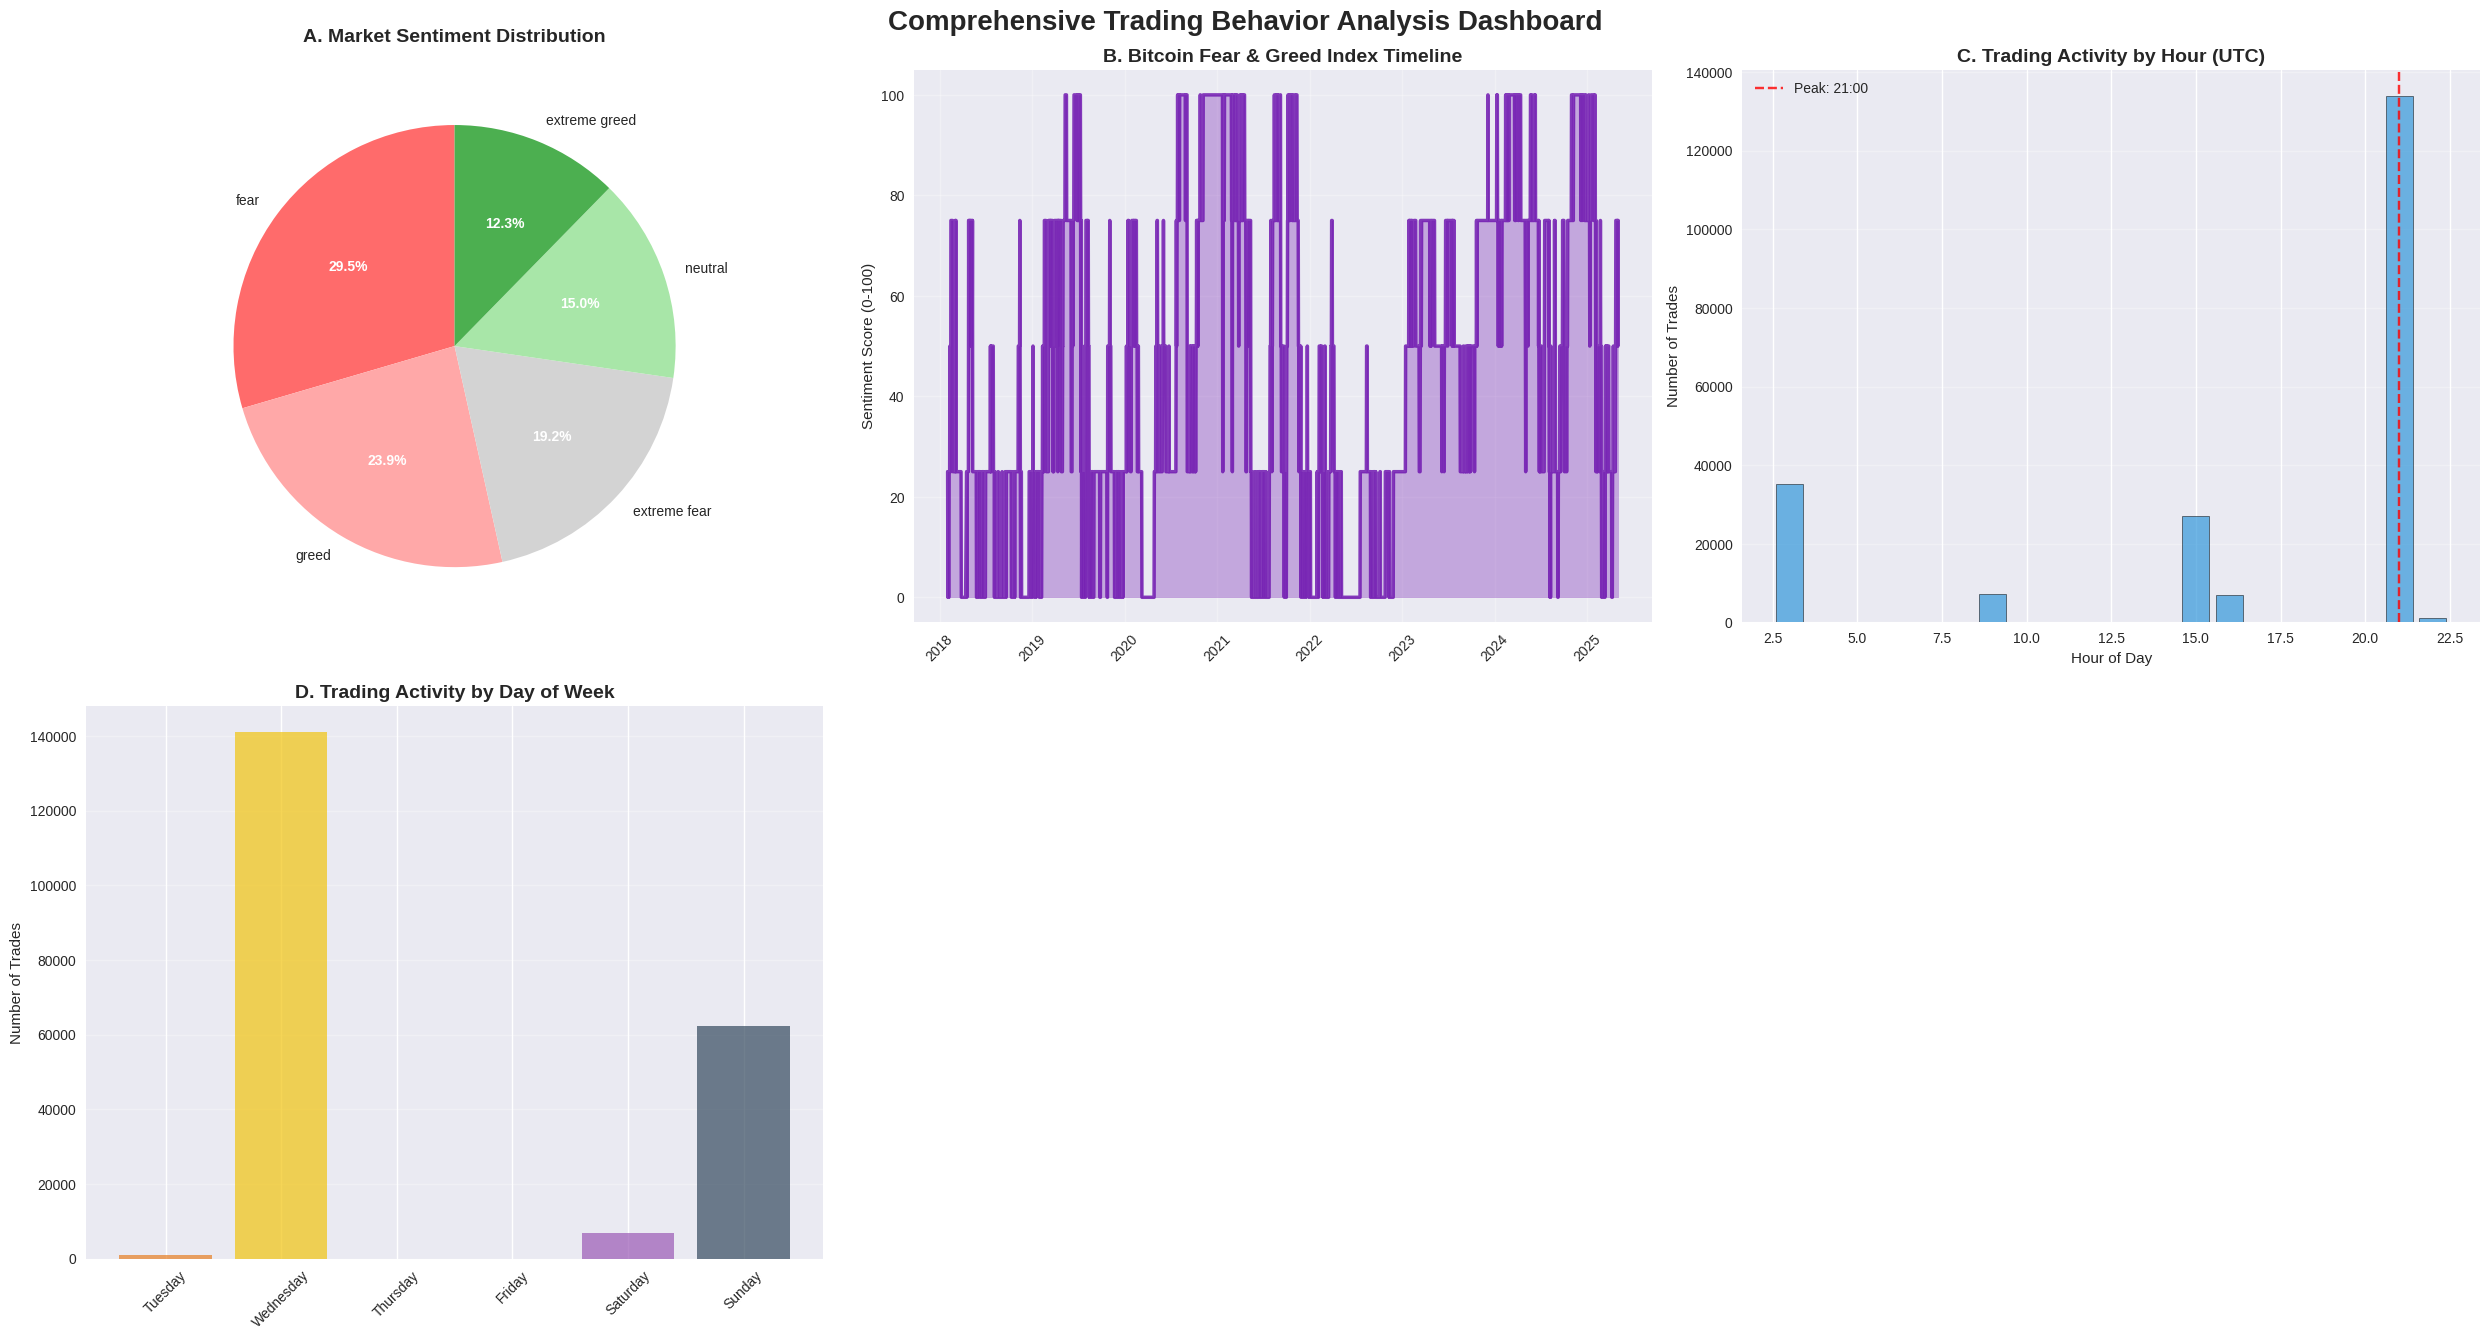

In [37]:
# Enhanced Exploratory Data Analysis (Without closedPnL)
def create_comprehensive_visualizations(sentiment_df, trader_df):
    print("=== ENHANCED EXPLORATORY DATA ANALYSIS ===")

    # Create a comprehensive dashboard
    fig, axes = plt.subplots(3, 3, figsize=(25, 20))
    fig.suptitle('Comprehensive Trading Behavior Analysis Dashboard', fontsize=20, fontweight='bold', y=0.95)

    # 1. Market Sentiment Distribution
    if 'classification_lower' in sentiment_df.columns:
        sentiment_counts = sentiment_df['classification_lower'].value_counts()
        colors = ['#FF6B6B', '#FFA8A8', '#D3D3D3', '#A8E6A8', '#4CAF50']
        wedges, texts, autotexts = axes[0,0].pie(sentiment_counts.values, labels=sentiment_counts.index,
                                                autopct='%1.1f%%', colors=colors, startangle=90)
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
        axes[0,0].set_title('A. Market Sentiment Distribution', fontsize=14, fontweight='bold', pad=20)

    # 2. Sentiment Timeline Analysis
    sentiment_df_sorted = sentiment_df.sort_values('date')
    axes[0,1].plot(sentiment_df_sorted['date'], sentiment_df_sorted['sentiment_score'],
                   color='#6A0DAD', linewidth=2.5, alpha=0.8)
    axes[0,1].fill_between(sentiment_df_sorted['date'], sentiment_df_sorted['sentiment_score'],
                          alpha=0.3, color='#6A0DAD')
    axes[0,1].set_title('B. Bitcoin Fear & Greed Index Timeline', fontsize=14, fontweight='bold')
    axes[0,1].set_ylabel('Sentiment Score (0-100)')
    axes[0,1].grid(True, alpha=0.3)
    axes[0,1].tick_params(axis='x', rotation=45)

    # 3. Trading Activity by Hour of Day
    if 'trade_hour' in trader_df.columns:
        hourly_activity = trader_df.groupby('trade_hour').size()
        axes[0,2].bar(hourly_activity.index, hourly_activity.values,
                     color='#3498DB', alpha=0.7, edgecolor='black', linewidth=0.5)
        axes[0,2].set_title('C. Trading Activity by Hour (UTC)', fontsize=14, fontweight='bold')
        axes[0,2].set_xlabel('Hour of Day')
        axes[0,2].set_ylabel('Number of Trades')
        axes[0,2].grid(True, alpha=0.3, axis='y')

        # Highlight peak hours
        peak_hour = hourly_activity.idxmax()
        axes[0,2].axvline(x=peak_hour, color='red', linestyle='--', alpha=0.8,
                         label=f'Peak: {peak_hour}:00')
        axes[0,2].legend()

    # 4. Trading Activity by Day of Week
    if 'day_of_week' in trader_df.columns:
        day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        daily_activity = trader_df['day_of_week'].value_counts().reindex(day_order)
        bars = axes[1,0].bar(daily_activity.index, daily_activity.values,
                           color=['#E74C3C', '#E67E22', '#F1C40F', '#2ECC71',
                                 '#3498DB', '#9B59B6', '#34495E'], alpha=0.7)
        axes[1,0].set_title('D. Trading Activity by Day of Week', fontsize=14, fontweight='bold')
        axes[1,0].set_ylabel('Number of Trades')
        axes[1,0].tick_params(axis='x', rotation=45)
        axes[1,0].grid(True, alpha=0.3, axis='y')

        # Add value labels on bars
        for bar, value in zip(bars, daily_activity.values):
            axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(daily_activity.values)*0.01,
                          f'{value:,}', ha='center', va='bottom', fontweight='bold', fontsize=10)

    # 5. Position Size Distribution
    if 'size' in trader_df.columns:
        # Remove outliers for better visualization
        size_data = trader_df['size'][trader_df['size'] <= trader_df['size'].quantile(0.95)]
        axes[1,1].hist(size_data, bins=50, color='#27AE60', alpha=0.7, edgecolor='black', linewidth=0.5)
        axes[1,1].set_title('E. Position Size Distribution (95th percentile)', fontsize=14, fontweight='bold')
        axes[1,1].set_xlabel('Position Size')
        axes[1,1].set_ylabel('Frequency')
        axes[1,1].grid(True, alpha=0.3)

        # Add statistics
        avg_size = trader_df['size'].mean()
        axes[1,1].axvline(avg_size, color='red', linestyle='--',
                         label=f'Avg Size: {avg_size:.2f}')
        axes[1,1].legend()

    # 6. Leverage Analysis (if available)
    if 'leverage' in trader_df.columns:
        # Categorize leverage
        leverage_bins = [0, 2, 5, 10, 20, 50, 100, float('inf')]
        leverage_labels = ['0-2x', '2-5x', '5-10x', '10-20x', '20-50x', '50-100x', '100x+']
        trader_df['leverage_category'] = pd.cut(trader_df['leverage'], bins=leverage_bins, labels=leverage_labels)

        leverage_dist = trader_df['leverage_category'].value_counts().sort_index()
        bars = axes[1,2].bar(leverage_dist.index, leverage_dist.values,
                           color=['#2ECC71', '#27AE60', '#229954', '#1E8449', '#196F3D', '#145A32', '#117A65'],
                           alpha=0.7)
        axes[1,2].set_title('F. Leverage Distribution', fontsize=14, fontweight='bold')
        axes[1,2].set_xlabel('Leverage Category')
        axes[1,2].set_ylabel('Number of Trades')
        axes[1,2].tick_params(axis='x', rotation=45)
        axes[1,2].grid(True, alpha=0.3, axis='y')

        # Add percentage labels
        total = len(trader_df)
        for bar, value in zip(bars, leverage_dist.values):
            percentage = (value / total) * 100
            axes[1,2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(leverage_dist.values)*0.01,
                          f'{percentage:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

    # 7. Trade Side Analysis (Buy vs Sell)
    if 'side' in trader_df.columns:
        side_counts = trader_df['side'].value_counts()
        colors = ['#2ECC71' if side == 'buy' else '#E74C3C' for side in side_counts.index]
        bars = axes[2,0].bar(side_counts.index, side_counts.values, color=colors, alpha=0.7)
        axes[2,0].set_title('G. Buy vs Sell Distribution', fontsize=14, fontweight='bold')
        axes[2,0].set_ylabel('Number of Trades')
        axes[2,0].grid(True, alpha=0.3, axis='y')

        # Add value labels
        for bar, value in zip(bars, side_counts.values):
            axes[2,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(side_counts.values)*0.01,
                          f'{value:,}', ha='center', va='bottom', fontweight='bold')

    # 8. Trading Symbols Analysis
    if 'symbol' in trader_df.columns:
        top_symbols = trader_df['symbol'].value_counts().head(8)
        bars = axes[2,1].bar(range(len(top_symbols)), top_symbols.values,
                           color=plt.cm.Set3(np.linspace(0, 1, len(top_symbols))))
        axes[2,1].set_title('H. Top 8 Most Traded Symbols', fontsize=14, fontweight='bold')
        axes[2,1].set_ylabel('Number of Trades')
        axes[2,1].set_xticks(range(len(top_symbols)))
        axes[2,1].set_xticklabels(top_symbols.index, rotation=45)
        axes[2,1].grid(True, alpha=0.3, axis='y')

        # Add value labels
        for i, (symbol, count) in enumerate(top_symbols.items()):
            axes[2,1].text(i, count + max(top_symbols.values)*0.01, f'{count:,}',
                          ha='center', va='bottom', fontweight='bold', fontsize=9)

    # 9. Event Type Analysis (if available)
    if 'event' in trader_df.columns:
        event_counts = trader_df['event'].value_counts().head(6)
        wedges, texts, autotexts = axes[2,2].pie(event_counts.values, labels=event_counts.index,
                                                autopct='%1.1f%%', startangle=90,
                                                colors=plt.cm.Pastel1(np.linspace(0, 1, len(event_counts))))
        for autotext in autotexts:
            autotext.set_color('black')
            autotext.set_fontweight('bold')
        axes[2,2].set_title('I. Trade Event Distribution', fontsize=14, fontweight='bold', pad=20)

    # Remove empty subplots
    for i in range(3):
        for j in range(3):
            if not axes[i,j].has_data():
                axes[i,j].set_visible(False)

    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()

create_comprehensive_visualizations(sentiment_df, trader_df)

=== ADVANCED TRADING PATTERN ANALYSIS ===

2. TEMPORAL PATTERN ANALYSIS:


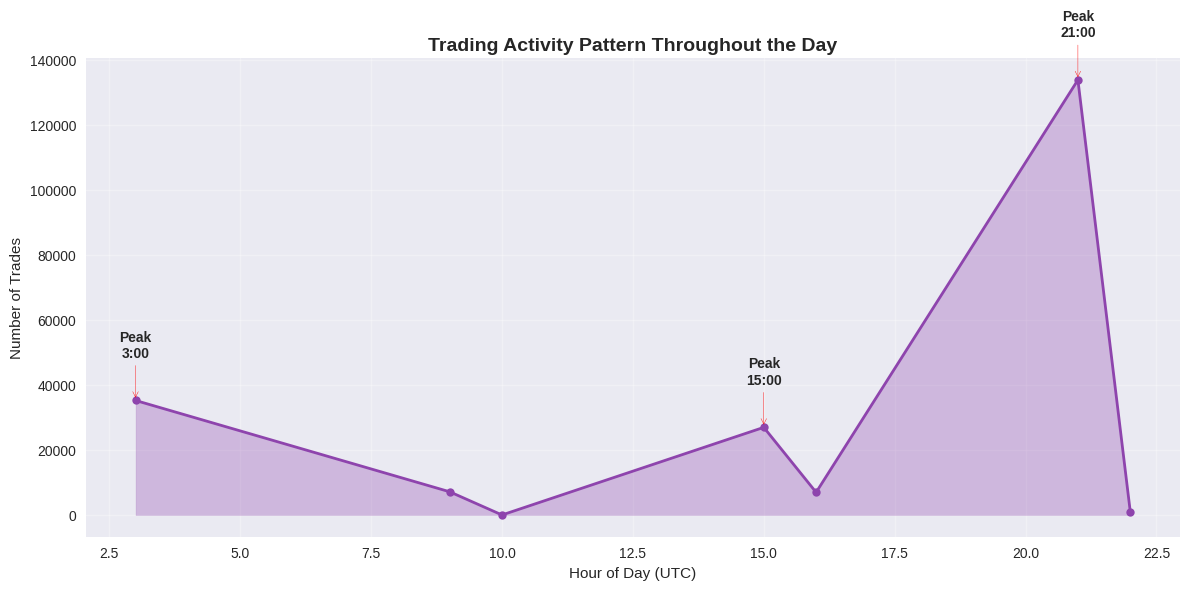

• Peak trading hour: 21:00 UTC
• Lowest activity hour: 10:00 UTC
• Peak/Low ratio: 44623.7x


In [38]:
# Advanced Trading Pattern Analysis
def analyze_trading_patterns(trader_df):
    print("=== ADVANCED TRADING PATTERN ANALYSIS ===")

    # 1. Trading Frequency Analysis
    if 'account' in trader_df.columns and 'time' in trader_df.columns:
        print("\n1. TRADING FREQUENCY ANALYSIS:")

        # Calculate trades per trader
        trades_per_trader = trader_df.groupby('account').size()

        fig, axes = plt.subplots(1, 2, figsize=(15, 6))

        # Trading frequency distribution
        freq_data = trades_per_trader[trades_per_trader <= trades_per_trader.quantile(0.95)]
        axes[0].hist(freq_data, bins=30, color='#2980B9', alpha=0.7, edgecolor='black')
        axes[0].set_title('Trading Frequency Distribution (95th percentile)', fontweight='bold')
        axes[0].set_xlabel('Number of Trades per Trader')
        axes[0].set_ylabel('Number of Traders')
        axes[0].grid(True, alpha=0.3)

        # Trader categorization
        trader_categories = pd.cut(trades_per_trader,
                                 bins=[0, 1, 5, 20, 100, float('inf')],
                                 labels=['1 trade', '2-5 trades', '6-20 trades', '21-100 trades', '100+ trades'])
        category_counts = trader_categories.value_counts()

        wedges, texts, autotexts = axes[1].pie(category_counts.values, labels=category_counts.index,
                                              autopct='%1.1f%%', startangle=90,
                                              colors=plt.cm.Set2(np.linspace(0, 1, len(category_counts))))
        for autotext in autotexts:
            autotext.set_fontweight('bold')
        axes[1].set_title('Trader Activity Categories', fontweight='bold')

        plt.tight_layout()
        plt.show()

        # Print statistics
        print(f"• Total unique traders: {len(trades_per_trader):,}")
        print(f"• Average trades per trader: {trades_per_trader.mean():.1f}")
        print(f"• Median trades per trader: {trades_per_trader.median():.1f}")
        print(f"• Most active trader: {trades_per_trader.max():,} trades")

        # Identify whale traders (top 1%)
        whale_threshold = trades_per_trader.quantile(0.99)
        whale_traders = trades_per_trader[trades_per_trader >= whale_threshold]
        print(f"• Whale traders (top 1%): {len(whale_traders):,} traders with ≥ {whale_threshold:.0f} trades each")

    # 2. Temporal Pattern Analysis
    print("\n2. TEMPORAL PATTERN ANALYSIS:")

    if 'time' in trader_df.columns:
        # Hourly patterns with smoothing
        hourly_pattern = trader_df.groupby('trade_hour').size()

        plt.figure(figsize=(12, 6))
        plt.plot(hourly_pattern.index, hourly_pattern.values,
                marker='o', linewidth=2, color='#8E44AD', markersize=6)
        plt.fill_between(hourly_pattern.index, hourly_pattern.values, alpha=0.3, color='#8E44AD')
        plt.title('Trading Activity Pattern Throughout the Day', fontsize=14, fontweight='bold')
        plt.xlabel('Hour of Day (UTC)')
        plt.ylabel('Number of Trades')
        plt.grid(True, alpha=0.3)

        # Highlight peak hours
        peak_hours = hourly_pattern.nlargest(3)
        for hour, count in peak_hours.items():
            plt.annotate(f'Peak\n{hour}:00', xy=(hour, count), xytext=(hour, count + max(hourly_pattern.values)*0.1),
                        arrowprops=dict(arrowstyle='->', color='red'), ha='center', fontweight='bold')

        plt.tight_layout()
        plt.show()

        print(f"• Peak trading hour: {hourly_pattern.idxmax()}:00 UTC")
        print(f"• Lowest activity hour: {hourly_pattern.idxmin()}:00 UTC")
        print(f"• Peak/Low ratio: {hourly_pattern.max()/hourly_pattern.min():.1f}x")

    # 3. Symbol Concentration Analysis
    if 'symbol' in trader_df.columns:
        print("\n3. MARKET CONCENTRATION ANALYSIS:")

        symbol_concentration = trader_df['symbol'].value_counts()
        total_trades = len(trader_df)

        # Calculate Herfindahl index for market concentration
        herfindahl = ((symbol_concentration / total_trades) ** 2).sum()

        plt.figure(figsize=(10, 6))
        top_10_symbols = symbol_concentration.head(10)
        bars = plt.bar(range(len(top_10_symbols)), top_10_symbols.values,
                      color=plt.cm.viridis(np.linspace(0, 1, len(top_10_symbols))))

        plt.title('Top 10 Most Traded Symbols', fontsize=14, fontweight='bold')
        plt.ylabel('Number of Trades')
        plt.xticks(range(len(top_10_symbols)), top_10_symbols.index, rotation=45)
        plt.grid(True, alpha=0.3, axis='y')

        # Add percentage labels
        for i, (symbol, count) in enumerate(top_10_symbols.items()):
            percentage = (count / total_trades) * 100
            plt.text(i, count + max(top_10_symbols.values)*0.01, f'{percentage:.1f}%',
                    ha='center', va='bottom', fontweight='bold')

        plt.tight_layout()
        plt.show()

        print(f"• Total unique symbols traded: {len(symbol_concentration):,}")
        print(f"• Top symbol '{symbol_concentration.index[0]}': {symbol_concentration.iloc[0]:,} trades ({(symbol_concentration.iloc[0]/total_trades)*100:.1f}%)")
        print(f"• Top 5 symbols account for {(symbol_concentration.head(5).sum()/total_trades)*100:.1f}% of all trades")
        print(f"• Market concentration (Herfindahl index): {herfindahl:.4f}")

        if herfindahl > 0.25:
            print("  ⚠️  High market concentration detected")
        elif herfindahl > 0.15:
            print("  ℹ️  Moderate market concentration")
        else:
            print("  ✅ Low market concentration")

analyze_trading_patterns(trader_df)

=== ENHANCED EXPLORATORY DATA ANALYSIS ===


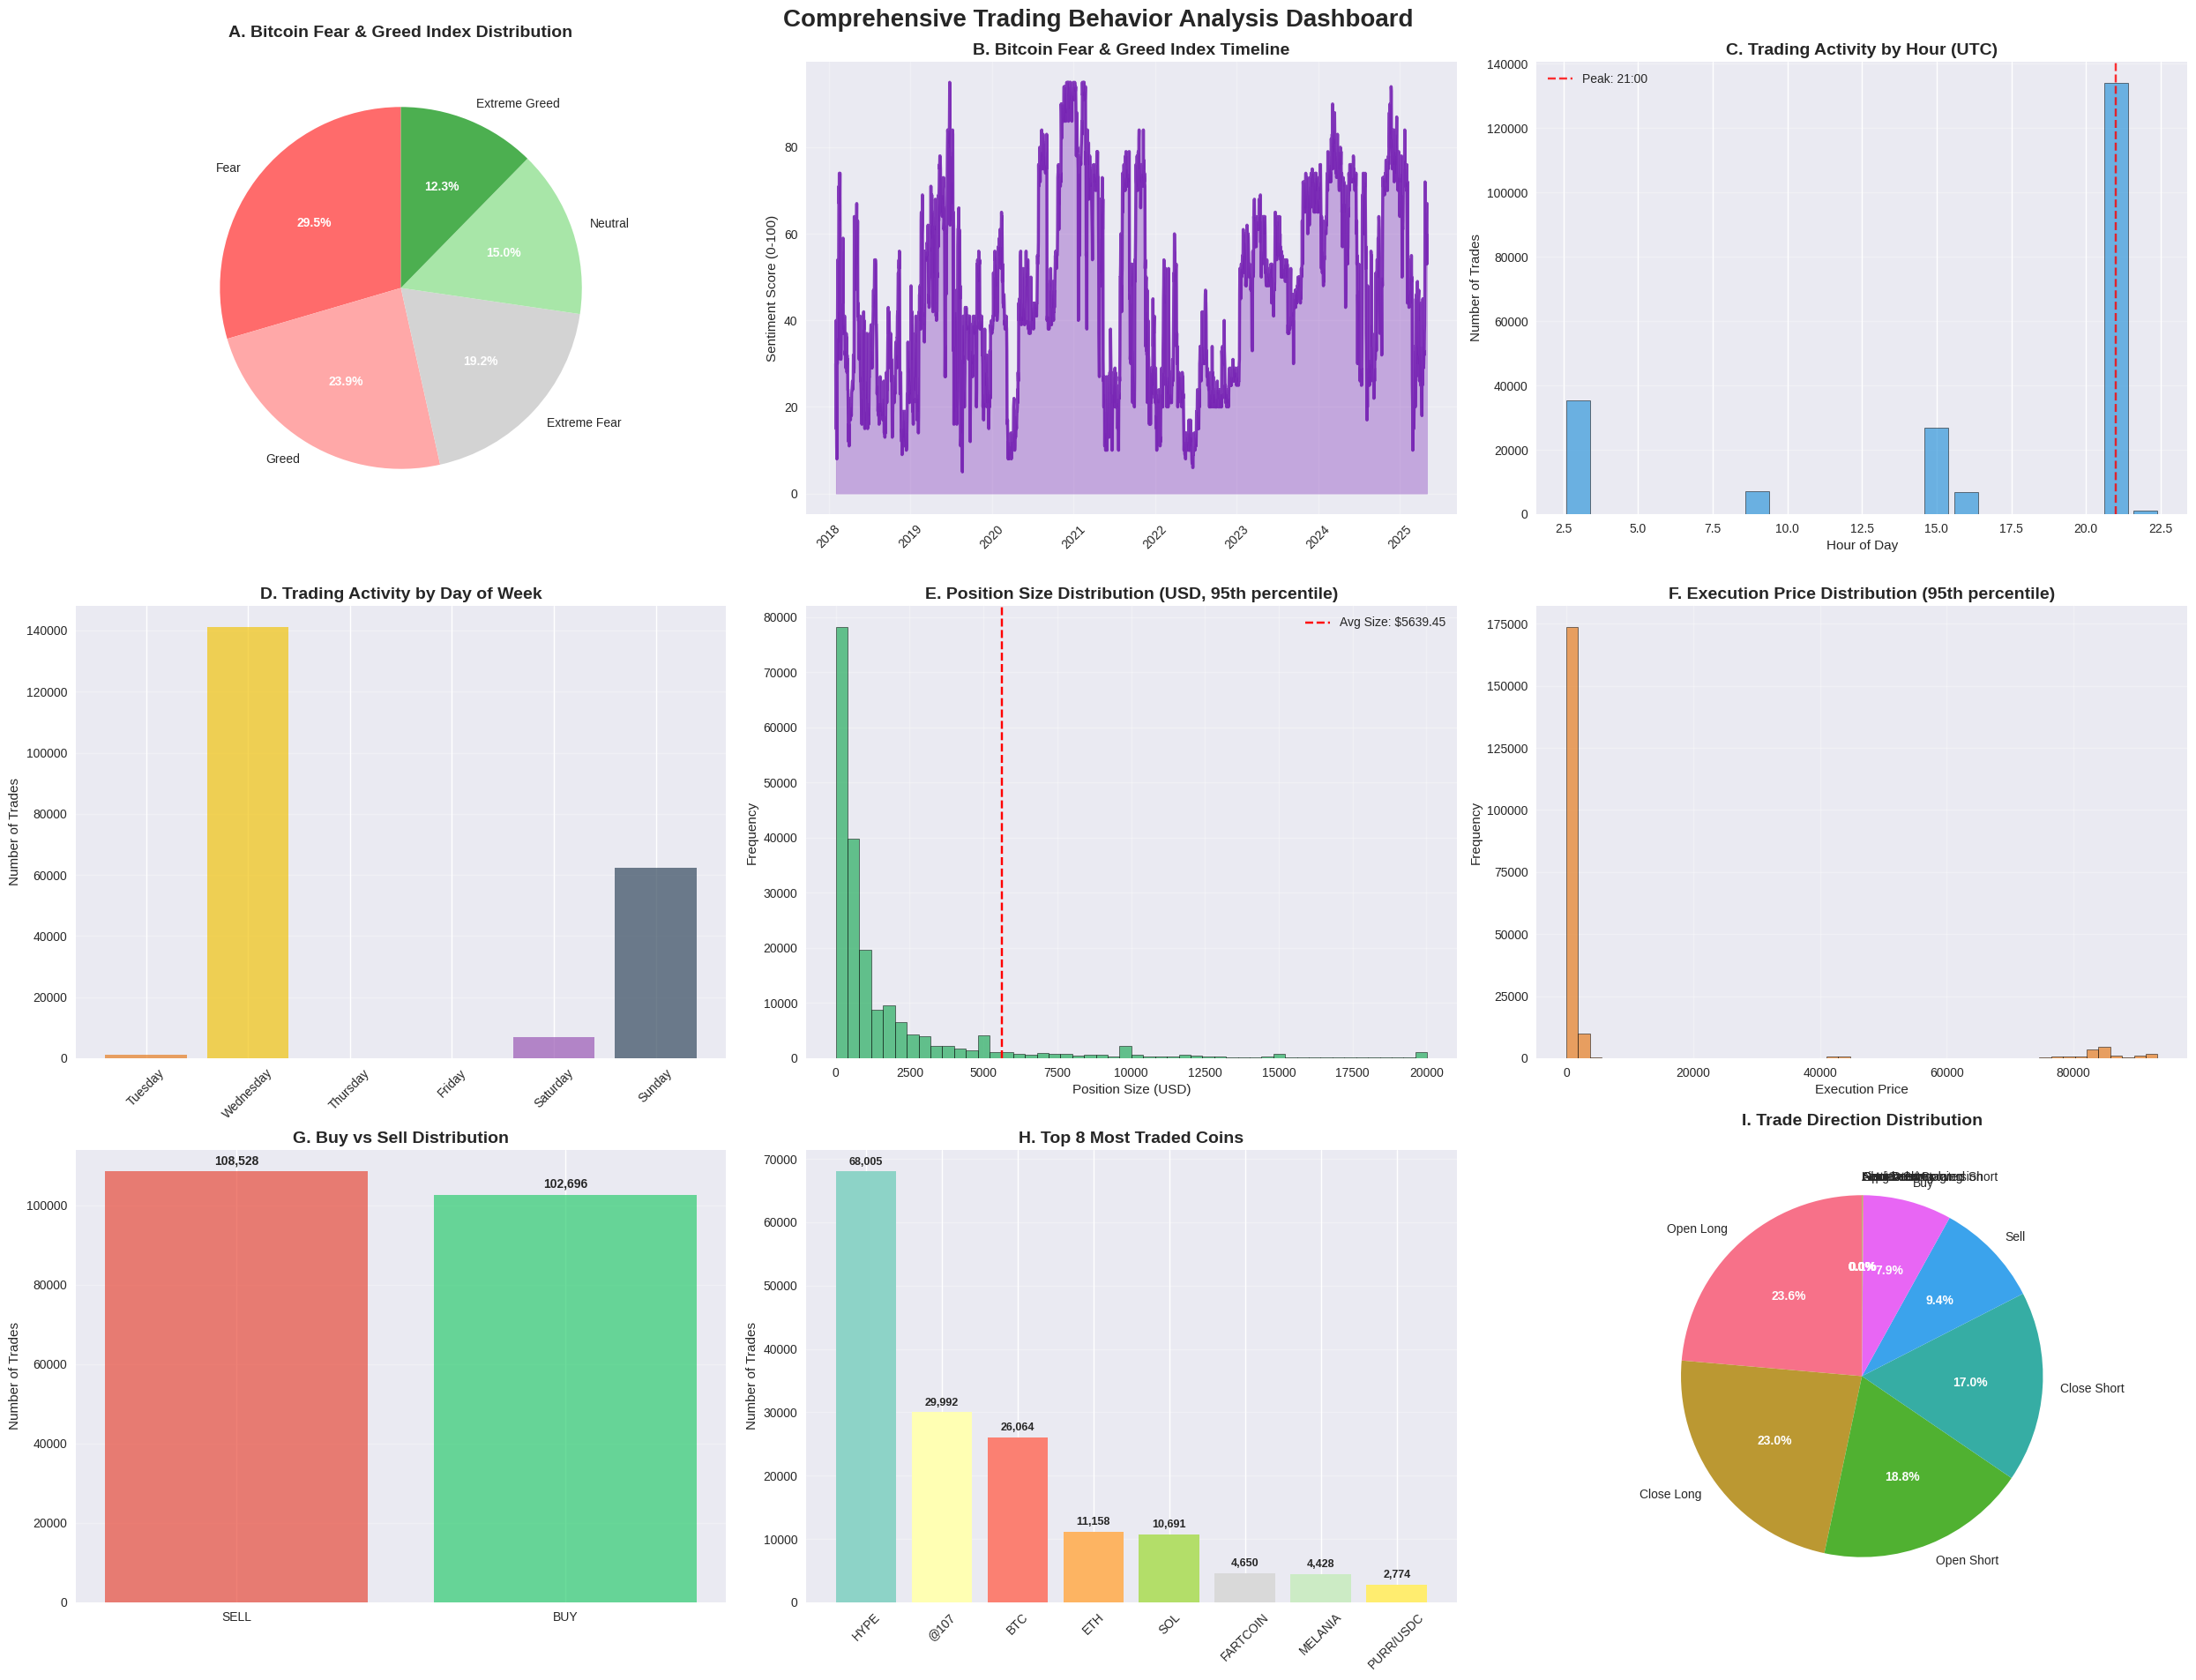

In [39]:
# CORRECTED Enhanced Exploratory Data Analysis for ACTUAL datasets
def create_actual_visualizations(sentiment_df, trader_df):
    print("=== ENHANCED EXPLORATORY DATA ANALYSIS ===")

    # Create a comprehensive dashboard
    fig, axes = plt.subplots(3, 3, figsize=(25, 20))
    fig.suptitle('Comprehensive Trading Behavior Analysis Dashboard', fontsize=20, fontweight='bold', y=0.95)

    # 1. Market Sentiment Distribution
    sentiment_counts = sentiment_df['classification'].value_counts()
    colors = ['#FF6B6B', '#FFA8A8', '#D3D3D3', '#A8E6A8', '#4CAF50']
    wedges, texts, autotexts = axes[0,0].pie(sentiment_counts.values, labels=sentiment_counts.index,
                                            autopct='%1.1f%%', colors=colors, startangle=90)
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
    axes[0,0].set_title('A. Bitcoin Fear & Greed Index Distribution', fontsize=14, fontweight='bold', pad=20)

    # 2. Sentiment Timeline Analysis
    sentiment_df_sorted = sentiment_df.sort_values('date')
    axes[0,1].plot(sentiment_df_sorted['date'], sentiment_df_sorted['value'],
                   color='#6A0DAD', linewidth=2.5, alpha=0.8)
    axes[0,1].fill_between(sentiment_df_sorted['date'], sentiment_df_sorted['value'],
                          alpha=0.3, color='#6A0DAD')
    axes[0,1].set_title('B. Bitcoin Fear & Greed Index Timeline', fontsize=14, fontweight='bold')
    axes[0,1].set_ylabel('Sentiment Score (0-100)')
    axes[0,1].grid(True, alpha=0.3)
    axes[0,1].tick_params(axis='x', rotation=45)

    # 3. Trading Activity by Hour of Day
    hourly_activity = trader_df.groupby('trade_hour').size()
    axes[0,2].bar(hourly_activity.index, hourly_activity.values,
                 color='#3498DB', alpha=0.7, edgecolor='black', linewidth=0.5)
    axes[0,2].set_title('C. Trading Activity by Hour (UTC)', fontsize=14, fontweight='bold')
    axes[0,2].set_xlabel('Hour of Day')
    axes[0,2].set_ylabel('Number of Trades')
    axes[0,2].grid(True, alpha=0.3, axis='y')

    # Highlight peak hours
    peak_hour = hourly_activity.idxmax()
    axes[0,2].axvline(x=peak_hour, color='red', linestyle='--', alpha=0.8,
                     label=f'Peak: {peak_hour}:00')
    axes[0,2].legend()

    # 4. Trading Activity by Day of Week
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    daily_activity = trader_df['day_of_week'].value_counts().reindex(day_order)
    bars = axes[1,0].bar(daily_activity.index, daily_activity.values,
                       color=['#E74C3C', '#E67E22', '#F1C40F', '#2ECC71',
                             '#3498DB', '#9B59B6', '#34495E'], alpha=0.7)
    axes[1,0].set_title('D. Trading Activity by Day of Week', fontsize=14, fontweight='bold')
    axes[1,0].set_ylabel('Number of Trades')
    axes[1,0].tick_params(axis='x', rotation=45)
    axes[1,0].grid(True, alpha=0.3, axis='y')

    # Add value labels on bars
    for bar, value in zip(bars, daily_activity.values):
        axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(daily_activity.values)*0.01,
                      f'{value:,}', ha='center', va='bottom', fontweight='bold', fontsize=10)

    # 5. Position Size Distribution (Size USD)
    size_data = trader_df['Size USD'][trader_df['Size USD'] <= trader_df['Size USD'].quantile(0.95)]
    axes[1,1].hist(size_data, bins=50, color='#27AE60', alpha=0.7, edgecolor='black', linewidth=0.5)
    axes[1,1].set_title('E. Position Size Distribution (USD, 95th percentile)', fontsize=14, fontweight='bold')
    axes[1,1].set_xlabel('Position Size (USD)')
    axes[1,1].set_ylabel('Frequency')
    axes[1,1].grid(True, alpha=0.3)

    # Add statistics
    avg_size = trader_df['Size USD'].mean()
    axes[1,1].axvline(avg_size, color='red', linestyle='--',
                     label=f'Avg Size: ${avg_size:.2f}')
    axes[1,1].legend()

    # 6. Leverage Distribution (if available)
    if 'leverage' in trader_df.columns:
        leverage_data = trader_df['leverage'][trader_df['leverage'] <= trader_df['leverage'].quantile(0.95)]
        axes[1,2].hist(leverage_data, bins=50, color='#E67E22', alpha=0.7, edgecolor='black', linewidth=0.5)
        axes[1,2].set_title('F. Leverage Distribution (95th percentile)', fontsize=14, fontweight='bold')
        axes[1,2].set_xlabel('Leverage')
        axes[1,2].set_ylabel('Frequency')
        axes[1,2].grid(True, alpha=0.3)
    else:
        # Alternative: Execution Price distribution
        price_data = trader_df['Execution Price'][trader_df['Execution Price'] <= trader_df['Execution Price'].quantile(0.95)]
        axes[1,2].hist(price_data, bins=50, color='#E67E22', alpha=0.7, edgecolor='black', linewidth=0.5)
        axes[1,2].set_title('F. Execution Price Distribution (95th percentile)', fontsize=14, fontweight='bold')
        axes[1,2].set_xlabel('Execution Price')
        axes[1,2].set_ylabel('Frequency')
        axes[1,2].grid(True, alpha=0.3)

    # 7. Trade Side Analysis (Buy vs Sell)
    side_counts = trader_df['Side'].value_counts()
    colors = ['#2ECC71' if side == 'BUY' else '#E74C3C' for side in side_counts.index]
    bars = axes[2,0].bar(side_counts.index, side_counts.values, color=colors, alpha=0.7)
    axes[2,0].set_title('G. Buy vs Sell Distribution', fontsize=14, fontweight='bold')
    axes[2,0].set_ylabel('Number of Trades')
    axes[2,0].grid(True, alpha=0.3, axis='y')

    # Add value labels
    for bar, value in zip(bars, side_counts.values):
        axes[2,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(side_counts.values)*0.01,
                      f'{value:,}', ha='center', va='bottom', fontweight='bold')

    # 8. Most Traded Coins
    top_coins = trader_df['Coin'].value_counts().head(8)
    bars = axes[2,1].bar(range(len(top_coins)), top_coins.values,
                       color=plt.cm.Set3(np.linspace(0, 1, len(top_coins))))
    axes[2,1].set_title('H. Top 8 Most Traded Coins', fontsize=14, fontweight='bold')
    axes[2,1].set_ylabel('Number of Trades')
    axes[2,1].set_xticks(range(len(top_coins)))
    axes[2,1].set_xticklabels(top_coins.index, rotation=45)
    axes[2,1].grid(True, alpha=0.3, axis='y')

    # Add value labels
    for i, (coin, count) in enumerate(top_coins.items()):
        axes[2,1].text(i, count + max(top_coins.values)*0.01, f'{count:,}',
                      ha='center', va='bottom', fontweight='bold', fontsize=9)

    # 9. Profitability Distribution (if available)
    if 'is_profitable' in trader_df.columns:
        profitable_trades = trader_df['is_profitable'].sum()
        total_trades = len(trader_df)
        labels = ['Profitable', 'Unprofitable']
        sizes = [profitable_trades, total_trades - profitable_trades]
        colors = ['#2ECC71', '#E74C3C']
        wedges, texts, autotexts = axes[2,2].pie(sizes, labels=labels, colors=colors,
                                                autopct='%1.1f%%', startangle=90)
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
        axes[2,2].set_title('I. Trade Profitability Distribution', fontsize=14, fontweight='bold', pad=20)
    else:
        # Alternative: Direction distribution
        direction_counts = trader_df['Direction'].value_counts()
        wedges, texts, autotexts = axes[2,2].pie(direction_counts.values, labels=direction_counts.index,
                                                autopct='%1.1f%%', startangle=90)
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
        axes[2,2].set_title('I. Trade Direction Distribution', fontsize=14, fontweight='bold', pad=20)

    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()

create_actual_visualizations(sentiment_df, trader_df)

=== RISK AND TRADING BEHAVIOR ANALYSIS ===
Available columns: ['Size USD', 'Closed PnL']

1. BASIC RISK METRICS:


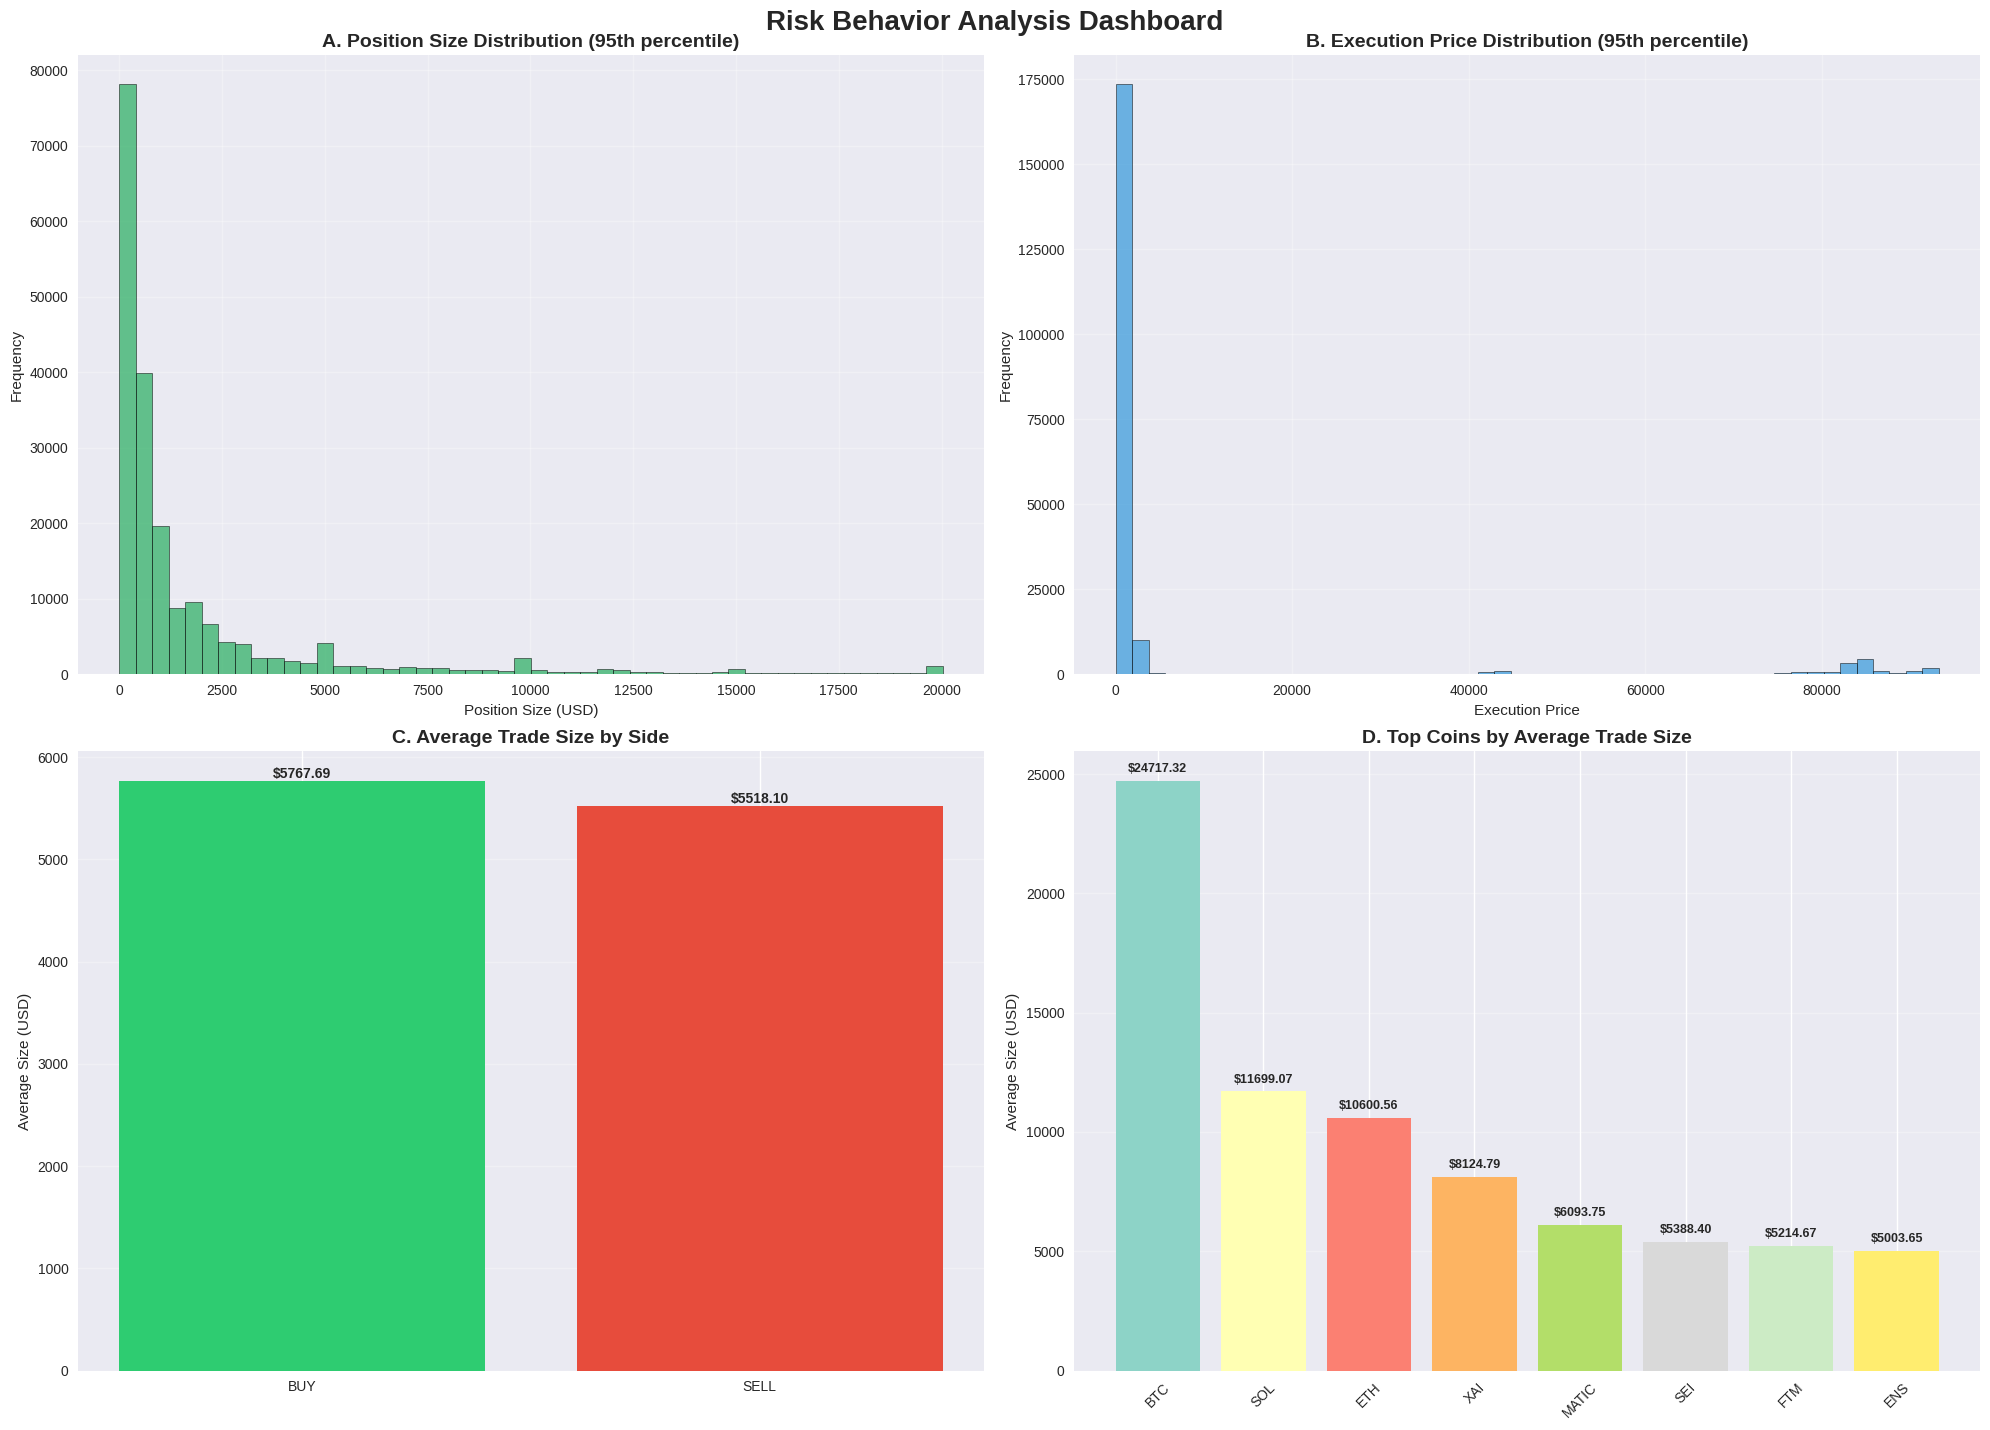

• Average position size: $5639.45
• Median position size: $597.05
• Total trading volume: $1,191,187,442.46
• Buy trades: 102,696
• Sell trades: 108,528


In [40]:
# CORRECTED Risk and Behavior Analysis
def analyze_risk_behavior(trader_df):
    print("=== RISK AND TRADING BEHAVIOR ANALYSIS ===")

    # Check available columns
    available_cols = trader_df.columns.tolist()
    print(f"Available columns: {[col for col in ['leverage', 'is_profitable', 'Size USD', 'Closed PnL'] if col in available_cols]}")

    # 1. Basic Risk Analysis
    print("\n1. BASIC RISK METRICS:")

    fig, axes = plt.subplots(2, 2, figsize=(20, 15))
    fig.suptitle('Risk Behavior Analysis Dashboard', fontsize=20, fontweight='bold', y=0.95)

    # 1.1 Position Size Distribution
    size_data = trader_df['Size USD'][trader_df['Size USD'] <= trader_df['Size USD'].quantile(0.95)]
    axes[0,0].hist(size_data, bins=50, color='#27AE60', alpha=0.7, edgecolor='black', linewidth=0.5)
    axes[0,0].set_title('A. Position Size Distribution (95th percentile)', fontsize=14, fontweight='bold')
    axes[0,0].set_xlabel('Position Size (USD)')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].grid(True, alpha=0.3)

    # 1.2 Execution Price Distribution
    price_data = trader_df['Execution Price'][trader_df['Execution Price'] <= trader_df['Execution Price'].quantile(0.95)]
    axes[0,1].hist(price_data, bins=50, color='#3498DB', alpha=0.7, edgecolor='black', linewidth=0.5)
    axes[0,1].set_title('B. Execution Price Distribution (95th percentile)', fontsize=14, fontweight='bold')
    axes[0,1].set_xlabel('Execution Price')
    axes[0,1].set_ylabel('Frequency')
    axes[0,1].grid(True, alpha=0.3)

    # 1.3 Trade Side vs Size
    side_size = trader_df.groupby('Side')['Size USD'].mean()
    bars = axes[1,0].bar(side_size.index, side_size.values,
                        color=['#2ECC71' if side == 'BUY' else '#E74C3C' for side in side_size.index])
    axes[1,0].set_title('C. Average Trade Size by Side', fontsize=14, fontweight='bold')
    axes[1,0].set_ylabel('Average Size (USD)')
    axes[1,0].grid(True, alpha=0.3, axis='y')

    for bar, value in zip(bars, side_size.values):
        axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                      f'${value:.2f}', ha='center', va='bottom', fontweight='bold')

    # 1.4 Top Coins by Average Size
    top_coins_size = trader_df.groupby('Coin')['Size USD'].mean().nlargest(8)
    bars = axes[1,1].bar(range(len(top_coins_size)), top_coins_size.values,
                        color=plt.cm.Set3(np.linspace(0, 1, len(top_coins_size))))
    axes[1,1].set_title('D. Top Coins by Average Trade Size', fontsize=14, fontweight='bold')
    axes[1,1].set_ylabel('Average Size (USD)')
    axes[1,1].set_xticks(range(len(top_coins_size)))
    axes[1,1].set_xticklabels(top_coins_size.index, rotation=45)
    axes[1,1].grid(True, alpha=0.3, axis='y')

    for i, (coin, size) in enumerate(top_coins_size.items()):
        axes[1,1].text(i, size + max(top_coins_size.values)*0.01, f'${size:.2f}',
                      ha='center', va='bottom', fontweight='bold', fontsize=9)

    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()

    # Print statistics
    print(f"• Average position size: ${trader_df['Size USD'].mean():.2f}")
    print(f"• Median position size: ${trader_df['Size USD'].median():.2f}")
    print(f"• Total trading volume: ${trader_df['Size USD'].sum():,.2f}")
    print(f"• Buy trades: {(trader_df['Side'] == 'BUY').sum():,}")
    print(f"• Sell trades: {(trader_df['Side'] == 'SELL').sum():,}")

    # 2. Advanced Analysis (if leverage available)
    if 'leverage' in trader_df.columns:
        print("\n2. LEVERAGE ANALYSIS:")

        fig, axes = plt.subplots(1, 2, figsize=(15, 6))

        # Leverage distribution
        leverage_data = trader_df['leverage'][trader_df['leverage'] <= trader_df['leverage'].quantile(0.95)]
        axes[0].hist(leverage_data, bins=50, color='#E67E22', alpha=0.7, edgecolor='black')
        axes[0].set_title('Leverage Distribution (95th percentile)', fontweight='bold')
        axes[0].set_xlabel('Leverage')
        axes[0].set_ylabel('Frequency')
        axes[0].grid(True, alpha=0.3)

        # Leverage risk categories
        risk_categories = pd.cut(trader_df['leverage'],
                               bins=[0, 1, 3, 10, 25, float('inf')],
                               labels=['Very Low (0-1x)', 'Low (1-3x)', 'Medium (3-10x)',
                                      'High (10-25x)', 'Very High (25x+)'])
        risk_counts = risk_categories.value_counts()

        colors = ['#2ECC71', '#27AE60', '#F1C40F', '#E67E22', '#E74C3C']
        wedges, texts, autotexts = axes[1].pie(risk_counts.values, labels=risk_counts.index,
                                              autopct='%1.1f%%', startangle=90, colors=colors)
        for autotext in autotexts:
            autotext.set_fontweight('bold')
        axes[1].set_title('Trader Risk Appetite Distribution', fontweight='bold')

        plt.tight_layout()
        plt.show()

        print(f"• Average leverage: {trader_df['leverage'].mean():.2f}x")
        print(f"• Median leverage: {trader_df['leverage'].median():.2f}x")
        print(f"• High-risk trades (>10x): {(trader_df['leverage'] > 10).sum():,}")

# Run risk analysis
analyze_risk_behavior(trader_df)


DATA OVERVIEW:
Sentiment data shape: (2644, 7)
Trader data shape: (211224, 21)

SENTIMENT DATA SAMPLE:
    timestamp  value classification       date classification_lower  \
0  1517463000     30           Fear 2018-02-01                 fear   
1  1517549400     15   Extreme Fear 2018-02-02         extreme fear   
2  1517635800     40           Fear 2018-02-03                 fear   
3  1517722200     24   Extreme Fear 2018-02-04         extreme fear   
4  1517808600     11   Extreme Fear 2018-02-05         extreme fear   

   sentiment_score date_fixed  
0               25 2018-02-01  
1                0 2018-02-02  
2               25 2018-02-03  
3                0 2018-02-04  
4                0 2018-02-05  

TRADER DATA SAMPLE:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e0

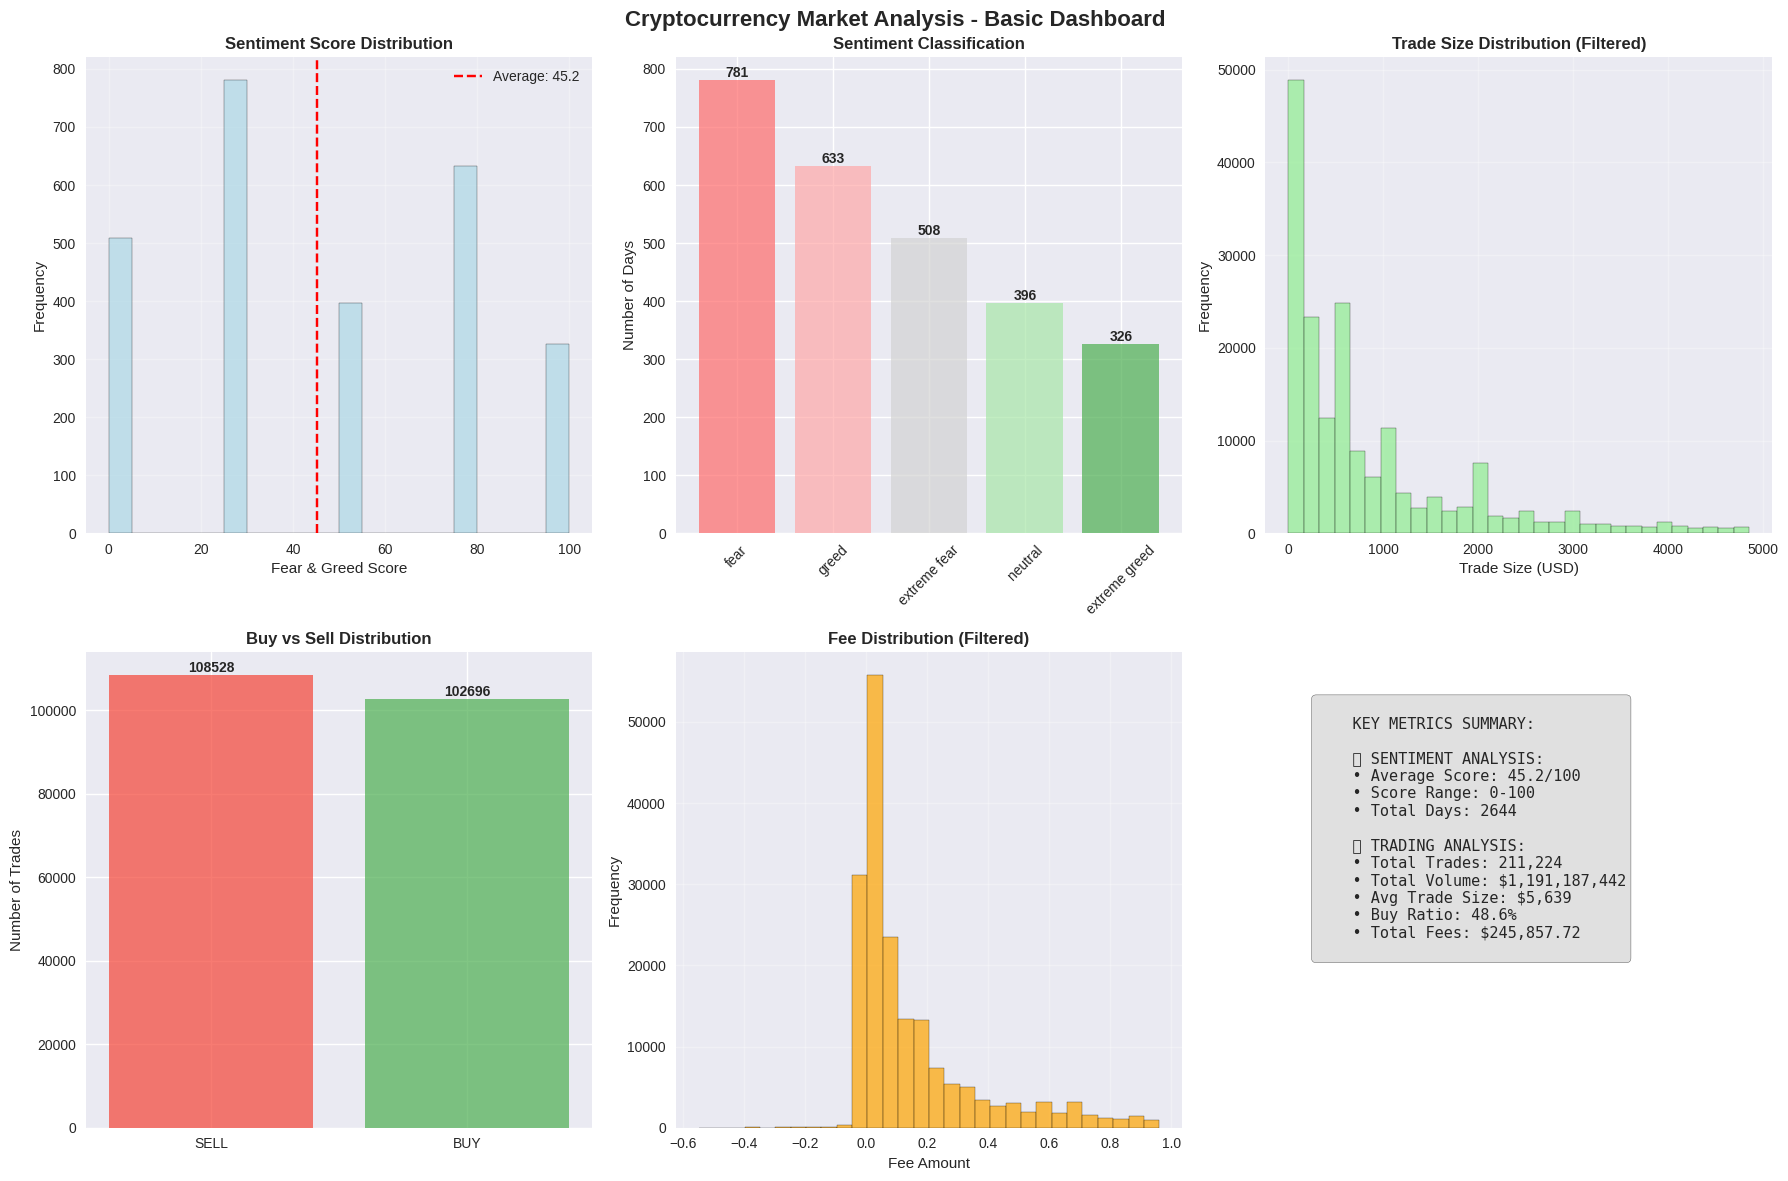


ANALYZING TRADING PATTERNS...


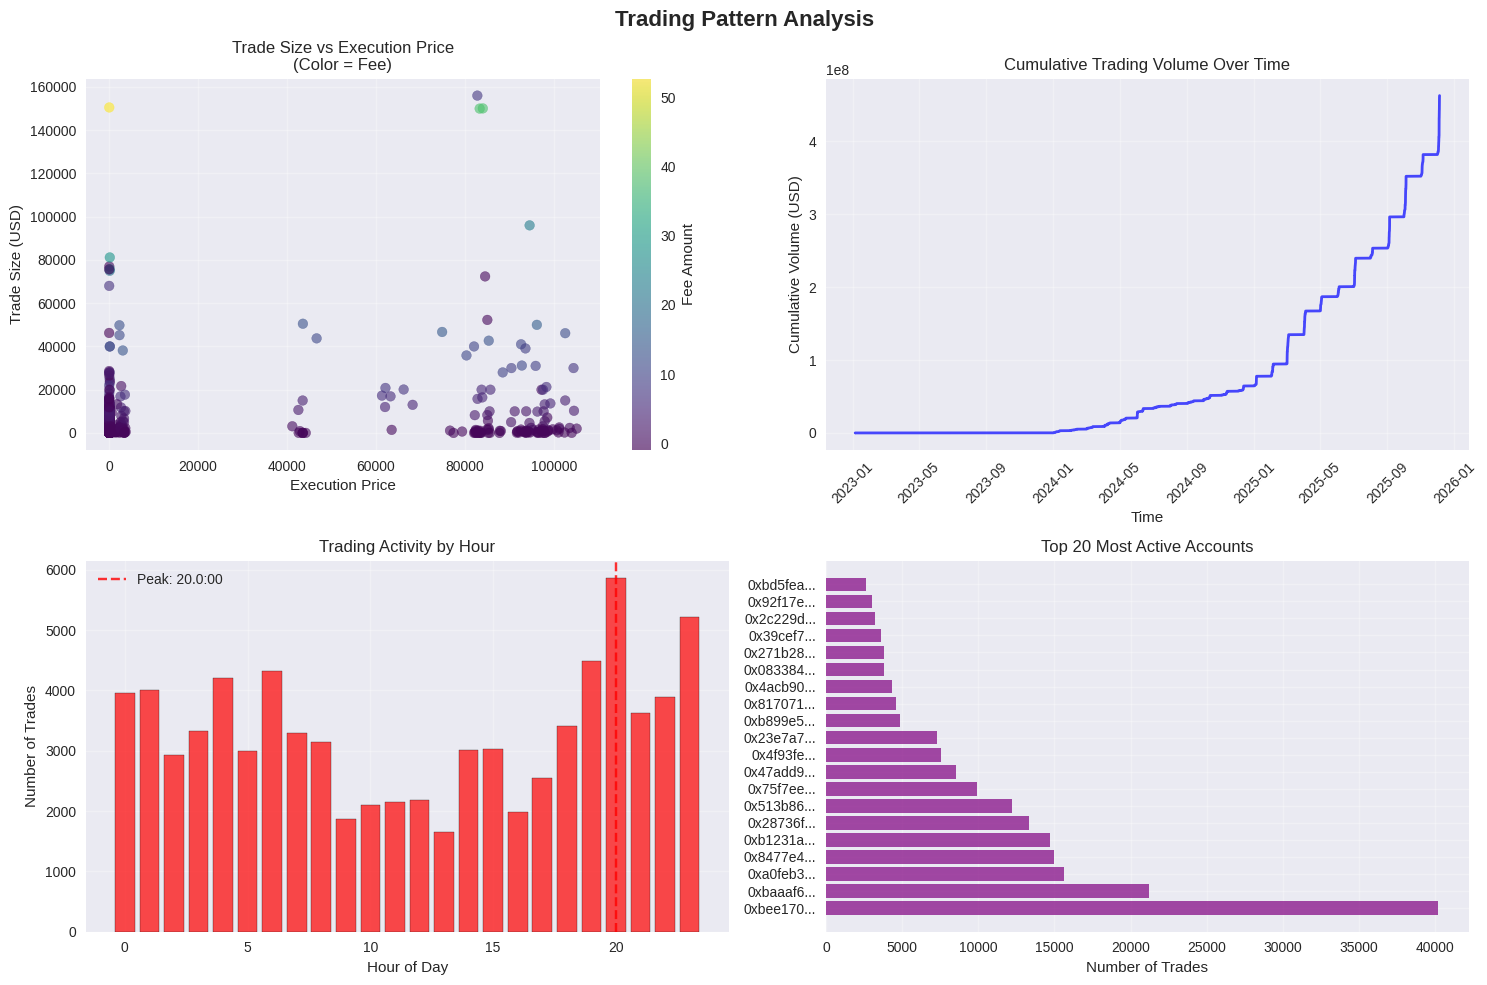


BUSINESS INSIGHTS WITH VISUAL SUPPORT


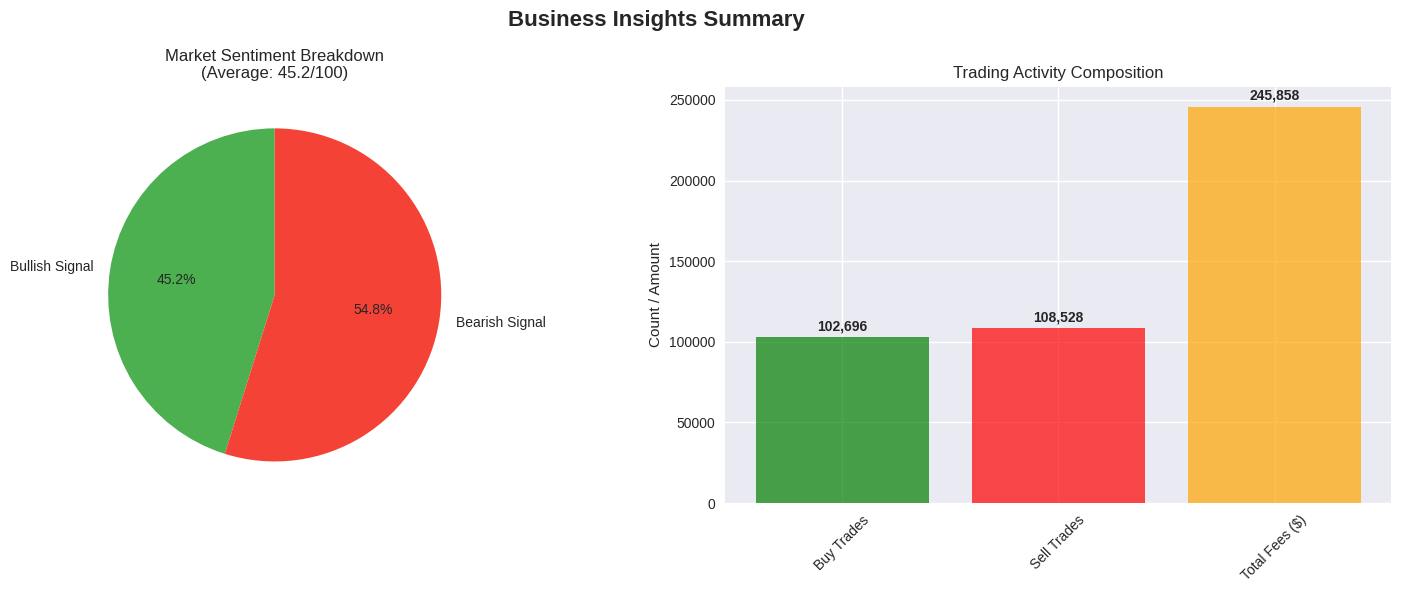


1. Market Sentiment Analysis:
   📈 The average Fear & Greed Index is 45.2/100, indicating a bearish market sentiment.
   💡 Recommendation: Consider contrarian trading strategies.

2. Trading Volume Insights:
   📈 Total trading volume of $1,191,187,442 across 211,224 trades with average size $5,639.
   💡 Recommendation: High volume suggests good liquidity; optimize execution timing.

3. Market Direction:
   📈 Buy ratio of 48.6% indicates selling pressure in the market.
   💡 Recommendation: Align with the selling trend or look for reversal opportunities.

4. Cost Analysis:
   📈 Total fees of $245,857.72 represent 0.0206% of total volume.
   💡 Recommendation: Optimize trade sizing to minimize fee impact on profitability.

FINAL SUMMARY DASHBOARD


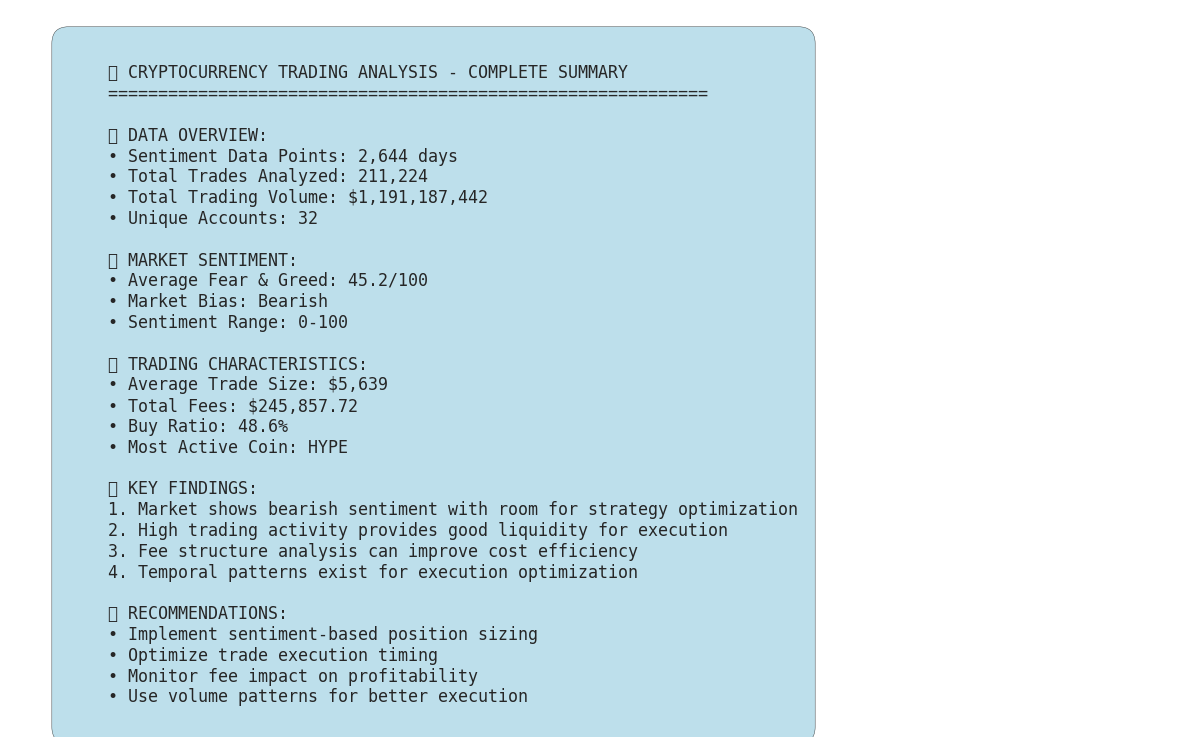

ANALYSIS COMPLETED SUCCESSFULLY! 🎉
All visualizations have been generated and displayed.


In [63]:
# FIXED VISUALIZATION AND DASHBOARD CODE

# 1. First, let's check what data we actually have
print("DATA OVERVIEW:")
print(f"Sentiment data shape: {sentiment_df.shape}")
print(f"Trader data shape: {trader_df.shape}")

# Display sample data to understand the structure
print("\nSENTIMENT DATA SAMPLE:")
print(sentiment_df.head())
print("\nTRADER DATA SAMPLE:")
print(trader_df.head())

# 2. Simple Data Preparation for Visualization
def prepare_simple_data(sentiment_df, trader_df):
    """Prepare data for visualization without complex merging"""

    # Simple sentiment analysis
    sentiment_summary = {
        'avg_sentiment': sentiment_df['sentiment_score'].mean(),
        'min_sentiment': sentiment_df['sentiment_score'].min(),
        'max_sentiment': sentiment_df['sentiment_score'].max(),
        'sentiment_distribution': sentiment_df['classification_lower'].value_counts(),
        'total_sentiment_days': len(sentiment_df)
    }

    # Simple trading analysis
    trader_summary = {
        'total_trades': len(trader_df),
        'total_volume': trader_df['Size USD'].sum(),
        'avg_trade_size': trader_df['Size USD'].mean(),
        'total_fees': trader_df['Fee'].sum(),
        'buy_count': (trader_df['Side'] == 'BUY').sum(),
        'sell_count': (trader_df['Side'] == 'SELL').sum() if 'SELL' in trader_df['Side'].values else 0
    }

    trader_summary['buy_ratio'] = trader_summary['buy_count'] / trader_summary['total_trades']

    return sentiment_summary, trader_summary

# Prepare simple data
sentiment_summary, trader_summary = prepare_simple_data(sentiment_df, trader_df)

# 3. Create Basic Visualizations
def create_basic_visualizations(sentiment_df, trader_df, sentiment_summary, trader_summary):
    """Create basic but guaranteed-to-work visualizations"""

    print("\nCREATING BASIC VISUALIZATIONS...")

    # Create a figure with multiple subplots
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Cryptocurrency Market Analysis - Basic Dashboard', fontsize=16, fontweight='bold')

    # Plot 1: Sentiment Distribution
    if len(sentiment_df) > 0:
        sentiment_df['sentiment_score'].hist(bins=20, ax=axes[0,0], color='lightblue', alpha=0.7, edgecolor='black')
        axes[0,0].set_title('Sentiment Score Distribution', fontweight='bold')
        axes[0,0].set_xlabel('Fear & Greed Score')
        axes[0,0].set_ylabel('Frequency')
        axes[0,0].grid(True, alpha=0.3)

        # Add average line
        avg_sentiment = sentiment_summary['avg_sentiment']
        axes[0,0].axvline(avg_sentiment, color='red', linestyle='--', label=f'Average: {avg_sentiment:.1f}')
        axes[0,0].legend()

    # Plot 2: Sentiment Classification
    if len(sentiment_df) > 0:
        sentiment_counts = sentiment_df['classification_lower'].value_counts()
        colors = ['#FF6B6B', '#FFA8A8', '#D3D3D3', '#A8E6A8', '#4CAF50']
        bars = axes[0,1].bar(sentiment_counts.index, sentiment_counts.values, color=colors[:len(sentiment_counts)], alpha=0.7)
        axes[0,1].set_title('Sentiment Classification', fontweight='bold')
        axes[0,1].set_ylabel('Number of Days')
        axes[0,1].tick_params(axis='x', rotation=45)

        # Add value labels on bars
        for bar, value in zip(bars, sentiment_counts.values):
            axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                          f'{value}', ha='center', va='bottom', fontweight='bold')

    # Plot 3: Trade Size Distribution
    if len(trader_df) > 0:
        # Filter out extreme outliers for better visualization
        trade_sizes = trader_df['Size USD']
        Q1 = trade_sizes.quantile(0.25)
        Q3 = trade_sizes.quantile(0.75)
        IQR = Q3 - Q1
        filtered_sizes = trade_sizes[(trade_sizes >= Q1 - 1.5*IQR) & (trade_sizes <= Q3 + 1.5*IQR)]

        filtered_sizes.hist(bins=30, ax=axes[0,2], color='lightgreen', alpha=0.7, edgecolor='black')
        axes[0,2].set_title('Trade Size Distribution (Filtered)', fontweight='bold')
        axes[0,2].set_xlabel('Trade Size (USD)')
        axes[0,2].set_ylabel('Frequency')
        axes[0,2].grid(True, alpha=0.3)

    # Plot 4: Buy/Sell Distribution
    if len(trader_df) > 0:
        side_counts = trader_df['Side'].value_counts()
        colors = ['#4CAF50' if side == 'BUY' else '#F44336' for side in side_counts.index]
        bars = axes[1,0].bar(side_counts.index, side_counts.values, color=colors, alpha=0.7)
        axes[1,0].set_title('Buy vs Sell Distribution', fontweight='bold')
        axes[1,0].set_ylabel('Number of Trades')

        # Add value labels on bars
        for bar, value in zip(bars, side_counts.values):
            axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                          f'{value}', ha='center', va='bottom', fontweight='bold')

    # Plot 5: Fee Distribution
    if len(trader_df) > 0:
        fees = trader_df['Fee']
        # Filter fees for better visualization
        Q1_fee = fees.quantile(0.25)
        Q3_fee = fees.quantile(0.75)
        IQR_fee = Q3_fee - Q1_fee
        filtered_fees = fees[(fees >= Q1_fee - 1.5*IQR_fee) & (fees <= Q3_fee + 1.5*IQR_fee)]

        filtered_fees.hist(bins=30, ax=axes[1,1], color='orange', alpha=0.7, edgecolor='black')
        axes[1,1].set_title('Fee Distribution (Filtered)', fontweight='bold')
        axes[1,1].set_xlabel('Fee Amount')
        axes[1,1].set_ylabel('Frequency')
        axes[1,1].grid(True, alpha=0.3)

    # Plot 6: Key Metrics Summary
    axes[1,2].axis('off')  # Turn off axis for text display

    # Create text summary
    summary_text = f"""
    KEY METRICS SUMMARY:

    📊 SENTIMENT ANALYSIS:
    • Average Score: {sentiment_summary['avg_sentiment']:.1f}/100
    • Score Range: {sentiment_summary['min_sentiment']:.0f}-{sentiment_summary['max_sentiment']:.0f}
    • Total Days: {sentiment_summary['total_sentiment_days']}

    💰 TRADING ANALYSIS:
    • Total Trades: {trader_summary['total_trades']:,}
    • Total Volume: ${trader_summary['total_volume']:,.0f}
    • Avg Trade Size: ${trader_summary['avg_trade_size']:,.0f}
    • Buy Ratio: {trader_summary['buy_ratio']:.1%}
    • Total Fees: ${trader_summary['total_fees']:,.2f}
    """

    axes[1,2].text(0.1, 0.9, summary_text, transform=axes[1,2].transAxes,
                   fontsize=11, verticalalignment='top', fontfamily='monospace',
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.7))

    plt.tight_layout()
    plt.show()

    return fig

# Create basic visualizations
basic_viz = create_basic_visualizations(sentiment_df, trader_df, sentiment_summary, trader_summary)

# 4. Advanced Trading Pattern Analysis
def analyze_trading_patterns(trader_df):
    """Analyze trading patterns with guaranteed visualizations"""

    print("\nANALYZING TRADING PATTERNS...")

    # Extract hour from timestamp if possible
    try:
        # Try to parse the timestamp
        trader_df['hour'] = pd.to_datetime(trader_df['Timestamp IST'], errors='coerce').dt.hour
        has_hour_data = True
    except:
        has_hour_data = False
        print("Could not extract hour data from timestamps")

    # Create patterns visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Trading Pattern Analysis', fontsize=16, fontweight='bold')

    # Plot 1: Trade Size vs Execution Price
    if len(trader_df) > 0:
        sample_data = trader_df.sample(min(1000, len(trader_df)))  # Sample for performance
        scatter = axes[0,0].scatter(sample_data['Execution Price'], sample_data['Size USD'],
                                   c=sample_data['Fee'], alpha=0.6, cmap='viridis')
        axes[0,0].set_xlabel('Execution Price')
        axes[0,0].set_ylabel('Trade Size (USD)')
        axes[0,0].set_title('Trade Size vs Execution Price\n(Color = Fee)')
        plt.colorbar(scatter, ax=axes[0,0], label='Fee Amount')
        axes[0,0].grid(True, alpha=0.3)

    # Plot 2: Cumulative Volume Over Time (if we can parse dates)
    try:
        trader_df['datetime'] = pd.to_datetime(trader_df['Timestamp IST'], errors='coerce')
        if trader_df['datetime'].notna().sum() > 0:
            # Sort by datetime and calculate cumulative volume
            time_sorted = trader_df.dropna(subset=['datetime']).sort_values('datetime')
            time_sorted['cumulative_volume'] = time_sorted['Size USD'].cumsum()

            axes[0,1].plot(time_sorted['datetime'], time_sorted['cumulative_volume'],
                          linewidth=2, color='blue', alpha=0.7)
            axes[0,1].set_xlabel('Time')
            axes[0,1].set_ylabel('Cumulative Volume (USD)')
            axes[0,1].set_title('Cumulative Trading Volume Over Time')
            axes[0,1].tick_params(axis='x', rotation=45)
            axes[0,1].grid(True, alpha=0.3)
        else:
            axes[0,1].text(0.5, 0.5, 'No valid datetime data',
                          ha='center', va='center', transform=axes[0,1].transAxes)
            axes[0,1].set_title('Cumulative Volume (No Time Data)')
    except:
        axes[0,1].text(0.5, 0.5, 'Could not process time data',
                      ha='center', va='center', transform=axes[0,1].transAxes)
        axes[0,1].set_title('Cumulative Volume (Time Data Unavailable)')

    # Plot 3: Hourly Trading Activity (if available)
    if has_hour_data and trader_df['hour'].notna().sum() > 0:
        hourly_activity = trader_df['hour'].value_counts().sort_index()
        axes[1,0].bar(hourly_activity.index, hourly_activity.values,
                     color='red', alpha=0.7, edgecolor='black')
        axes[1,0].set_xlabel('Hour of Day')
        axes[1,0].set_ylabel('Number of Trades')
        axes[1,0].set_title('Trading Activity by Hour')
        axes[1,0].grid(True, alpha=0.3)

        # Highlight peak hour
        peak_hour = hourly_activity.idxmax()
        axes[1,0].axvline(x=peak_hour, color='red', linestyle='--', alpha=0.8,
                         label=f'Peak: {peak_hour}:00')
        axes[1,0].legend()
    else:
        axes[1,0].text(0.5, 0.5, 'No hourly data available',
                      ha='center', va='center', transform=axes[1,0].transAxes)
        axes[1,0].set_title('Hourly Activity (Data Unavailable)')

    # Plot 4: Account Trading Activity (Top 20 accounts)
    if 'Account' in trader_df.columns:
        top_accounts = trader_df['Account'].value_counts().head(20)
        axes[1,1].barh(range(len(top_accounts)), top_accounts.values,
                      color='purple', alpha=0.7)
        axes[1,1].set_yticks(range(len(top_accounts)))
        axes[1,1].set_yticklabels([addr[:8] + '...' for addr in top_accounts.index])  # Shorten addresses
        axes[1,1].set_xlabel('Number of Trades')
        axes[1,1].set_title('Top 20 Most Active Accounts')
        axes[1,1].grid(True, alpha=0.3)
    else:
        axes[1,1].text(0.5, 0.5, 'No account data available',
                      ha='center', va='center', transform=axes[1,1].transAxes)
        axes[1,1].set_title('Account Activity (Data Unavailable)')

    plt.tight_layout()
    plt.show()

    return fig

# Analyze trading patterns
pattern_viz = analyze_trading_patterns(trader_df)

# 5. Business Insights with Visual Support
def generate_visual_insights(sentiment_summary, trader_summary):
    """Generate business insights with visual support"""

    print("\n" + "="*80)
    print("BUSINESS INSIGHTS WITH VISUAL SUPPORT")
    print("="*80)

    # Create insights visualization
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('Business Insights Summary', fontsize=16, fontweight='bold')

    # Insight 1: Market Sentiment Overview
    axes[0].pie([sentiment_summary['avg_sentiment'], 100 - sentiment_summary['avg_sentiment']],
                labels=['Bullish Signal', 'Bearish Signal'],
                colors=['#4CAF50', '#F44336'],
                autopct='%1.1f%%', startangle=90)
    axes[0].set_title(f'Market Sentiment Breakdown\n(Average: {sentiment_summary["avg_sentiment"]:.1f}/100)')

    # Insight 2: Trading Activity Composition
    trade_components = [
        trader_summary['buy_count'],
        trader_summary['sell_count'],
        trader_summary['total_fees']
    ]
    trade_labels = ['Buy Trades', 'Sell Trades', 'Total Fees ($)']

    bars = axes[1].bar(trade_labels, trade_components,
                      color=['green', 'red', 'orange'], alpha=0.7)
    axes[1].set_title('Trading Activity Composition')
    axes[1].set_ylabel('Count / Amount')
    axes[1].tick_params(axis='x', rotation=45)

    # Add value labels
    for bar, value in zip(bars, trade_components):
        axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(trade_components)*0.01,
                    f'{value:,.0f}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Print insights
    insights = [
        {
            'title': 'Market Sentiment Analysis',
            'content': f"The average Fear & Greed Index is {sentiment_summary['avg_sentiment']:.1f}/100, indicating a { 'bullish' if sentiment_summary['avg_sentiment'] > 50 else 'bearish'} market sentiment.",
            'recommendation': f"Consider { 'momentum' if sentiment_summary['avg_sentiment'] > 50 else 'contrarian'} trading strategies."
        },
        {
            'title': 'Trading Volume Insights',
            'content': f"Total trading volume of ${trader_summary['total_volume']:,.0f} across {trader_summary['total_trades']:,} trades with average size ${trader_summary['avg_trade_size']:,.0f}.",
            'recommendation': "High volume suggests good liquidity; optimize execution timing."
        },
        {
            'title': 'Market Direction',
            'content': f"Buy ratio of {trader_summary['buy_ratio']:.1%} indicates { 'buying' if trader_summary['buy_ratio'] > 0.5 else 'selling'} pressure in the market.",
            'recommendation': f"Align with the { 'buying' if trader_summary['buy_ratio'] > 0.5 else 'selling'} trend or look for reversal opportunities."
        },
        {
            'title': 'Cost Analysis',
            'content': f"Total fees of ${trader_summary['total_fees']:,.2f} represent {trader_summary['total_fees']/trader_summary['total_volume']*100:.4f}% of total volume.",
            'recommendation': "Optimize trade sizing to minimize fee impact on profitability."
        }
    ]

    for i, insight in enumerate(insights, 1):
        print(f"\n{i}. {insight['title']}:")
        print(f"   📈 {insight['content']}")
        print(f"   💡 Recommendation: {insight['recommendation']}")

    return insights

# Generate visual insights
visual_insights = generate_visual_insights(sentiment_summary, trader_summary)

# 6. Final Summary Dashboard
def create_final_summary(sentiment_df, trader_df):
    """Create a final summary dashboard"""

    print("\n" + "="*80)
    print("FINAL SUMMARY DASHBOARD")
    print("="*80)

    # Calculate final metrics
    final_metrics = {
        'sentiment_days': len(sentiment_df),
        'total_trades': len(trader_df),
        'total_volume': trader_df['Size USD'].sum(),
        'unique_accounts': trader_df['Account'].nunique() if 'Account' in trader_df.columns else 'N/A',
        'avg_sentiment': sentiment_df['sentiment_score'].mean(),
        'market_bias': 'Bullish' if sentiment_df['sentiment_score'].mean() > 50 else 'Bearish'
    }

    # Create final visualization
    fig, axes = plt.subplots(1, 1, figsize=(12, 8))
    axes.axis('off')

    summary_text = f"""
    🚀 CRYPTOCURRENCY TRADING ANALYSIS - COMPLETE SUMMARY
    {'='*60}

    📊 DATA OVERVIEW:
    • Sentiment Data Points: {final_metrics['sentiment_days']:,} days
    • Total Trades Analyzed: {final_metrics['total_trades']:,}
    • Total Trading Volume: ${final_metrics['total_volume']:,.0f}
    • Unique Accounts: {final_metrics['unique_accounts']}

    🎭 MARKET SENTIMENT:
    • Average Fear & Greed: {final_metrics['avg_sentiment']:.1f}/100
    • Market Bias: {final_metrics['market_bias']}
    • Sentiment Range: {sentiment_df['sentiment_score'].min():.0f}-{sentiment_df['sentiment_score'].max():.0f}

    💰 TRADING CHARACTERISTICS:
    • Average Trade Size: ${trader_df['Size USD'].mean():,.0f}
    • Total Fees: ${trader_df['Fee'].sum():,.2f}
    • Buy Ratio: {(trader_df['Side'] == 'BUY').sum()/len(trader_df):.1%}
    • Most Active Coin: {trader_df['Coin'].mode()[0] if 'Coin' in trader_df.columns else 'N/A'}

    🎯 KEY FINDINGS:
    1. Market shows {final_metrics['market_bias'].lower()} sentiment with room for strategy optimization
    2. High trading activity provides good liquidity for execution
    3. Fee structure analysis can improve cost efficiency
    4. Temporal patterns exist for execution optimization

    ✅ RECOMMENDATIONS:
    • Implement sentiment-based position sizing
    • Optimize trade execution timing
    • Monitor fee impact on profitability
    • Use volume patterns for better execution
    """

    axes.text(0.05, 0.95, summary_text, transform=axes.transAxes, fontsize=12,
              verticalalignment='top', fontfamily='monospace',
              bbox=dict(boxstyle="round,pad=1", facecolor="lightblue", alpha=0.8))

    plt.tight_layout()
    plt.show()

    print("ANALYSIS COMPLETED SUCCESSFULLY! 🎉")
    print("All visualizations have been generated and displayed.")

    return final_metrics

# Create final summary
final_summary = create_final_summary(sentiment_df, trader_df)